# COGS 108 - Predictive Analysis using Team Compositions

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

League of Legends is a popular multiplayer video game where players work on a team, typically composed of five players each, to defeat the enemy team by destroying the enemy nexus. In the matchmaking process, players can select a wide variety of champions (157 unique champions) which all have a unique set of skills, and advantages. In our project, we're working with the competitive aspect of the game where players queue up in a ranked lobby, and compete against other teams with unique team compositions in order to achieve the highest rank. Given the competitive nature of ranked league of legend games, we wondered if it was possible to predict which team was going to win before the game started (matchmaking process) given that the team compositions are revealed before the game starts. If we could create an algorithm to predict which team had a significant probability of winning with high accuracy, then we could leverage the algorithm to instruct players when to dodge the game and find a new matchmaking lobby.

# Names

- Daniel Lam
- Jacky Dam
- Katherine Lim
- Michael Phung

<a id='research_question'></a>
# Research Question

In the game League of Legends, players select certain characters (champions) to play in team-based matches against an opposing team and try to achieve victory. Given a wide selection of team compositions from past matches and whether or not they won or lost, can we determine a team's probability of winning during the matchmaking process of the game?

<a id='background'></a>

# Background & Prior Work

## What is League of Legends?
League of Legends is a popular free-to-play Multiplayer Online Battle Arena (MOBA) game in which opposing teams made up of five players clash against each other with the goal of destroying the enemy base. There are various game modes within League of Legends varying from non-competitive "normal" games to arcade-like games which are less stressful and less competitive, although they could get a little cutthroat. For our work however, we will look primarily at competitive matches, or "ranked". In a competitive match, each team is made up of five unique characters AKA champions and each player has a given role: top lane, jungle, mid lane, bot lane or support/utility.  
League of Legends was developed in 2009 by Riot Games and has since then gained much popularity - even becoming the number one e-sport in the world. Its popularity has inaugurated an era where spin off games and TV shows are being created. The streaming television series *Arcane* follows the lore of League of Legends champions and has taken Netflix by storm reaching the top charts and leaving *Squid Game* in the dust. As of late 2021, there are 180 million monthly players (3) which ranks League of Legends as one of the most played video games in history.  

Several of our team members have prior experience w/ League of Legends, and worked on previous projects which involves data analysis, data mining, and machine learning. We plan on utilizing the Riot Games API (1) Cassiopeia to extract a large set of data to develop our recommendation algorithm. Additionally, we plan on utilizing python and certain libraries such as: Numpy, Matplotlib, and Scikit-Learn for our data analysis. 

## What is already known?
There are many websites online that analyze individual player stats or champion stats. These statistics cover the whole range from low ranked players who are just learning the game to higher ranked players who have spent numerous hours developing their skill. According to a study done online by github user @leejaeka, each champion can be ranked by their win rates and it is possible to fabricate the "perfect" team composition. However, just because we are given how often a champion wins, it does not tell us the overall likelihood of winning given how those champions or organized into specific teams. 

## Why is this important?
Because League of Legends has a huge fanbase for its competitive scene, being able to predict how likely a team is to win based off of their team composition is a powerful tool for the future of esports. Of course, percentages are not deterministic of which professional team will win but they could be used to influence how much money a viewer bets during a fantasy League of Legends game, for example. Alternatively, a team could build their team composition based on how high the win rate is of those champions in a given season. Knowing how compositions perform versus others may change the status quo of the game and may force the game to evolve as players learn more about their probability of winning.

#### References:
- (1) https://github.com/meraki-analytics/cassiopeia
- (2) https://leejaeka.github.io/jaekangai/fastpages/jupyter/2020/10/28/lolpredict.html#Get-dataset
- (3) https://leaguefeed.net/did-you-know-total-league-of-legends-player-count-updated/#:~:text=League%20of%20Legends%20player%20count%20in%202021%20has%20reached%20a,to%20their%20TV%20series%2C%20Arcane!

# Hypothesis


We hypothesize that the probability of winning can be predicted given a team's composition of champions. We believe this because certain champions are chosen significantly more than others in competitive play. 

# Dataset(s)

- Dataset Name: match_history.csv
- Link to the dataset: https://github.com/COGS108/Group024-Fa21/blob/master/match_history.csv
- Number of observations: 

We extracted this dataset using the Riot Games API library (https://github.com/meraki-analytics/cassiopeia), and contains match history information for many high ranking players (diamond, high elo).

# Setup

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import random

# Data Cleaning

To understand the data cleaning process, we first need to understand which columns we need from the dataset. We will take a look at what the data looks like, and look for any interesting features.

In [2]:
# Read the CSV file for the player match history. Display a match with all the players.
matches = pd.read_csv("match_history.csv")
matches.head(20)

,match_id,duration,summoner_name,side,team_position,summoner_level,win,champion,kills,deaths,assists,damage_to_turrets,gold_earned,turret_takedowns,vision_score,minions_killed,first_blood,first_tower
0,4118898873,0:00:02.072000,Clemency5th,blue,top_lane,195,True,Lillia,7,5,9,1718,13627,3,26,245,False,False
1,4118898873,0:00:02.072000,PikaGirl,blue,jungle,45,True,Hecarim,7,3,18,0,15672,0,30,59,False,False
2,4118898873,0:00:02.072000,RSH,blue,mid_lane,242,True,Garen,7,6,10,6265,13097,3,29,208,False,False
3,4118898873,0:00:02.072000,The Doggo,blue,bot_lane,750,True,Vayne,7,4,6,4925,14166,3,45,250,True,False
4,4118898873,0:00:02.072000,μREDACTEDμ,blue,utility,96,True,Rakan,3,2,18,983,9170,2,64,36,False,False
5,4118898873,0:00:02.072000,LTQ JBD,red,top_lane,589,False,Gangplank,5,7,5,4040,17191,3,29,270,False,False
6,4118898873,0:00:02.072000,ready to sink,red,jungle,360,False,Graves,3,4,12,1694,15248,2,43,71,False,True
7,4118898873,0:00:02.072000,smart kevin,red,mid_lane,589,False,Yasuo,6,5,5,858,14175,0,23,275,False,False
8,4118898873,0:00:02.072000,MeloMance,red,bot_lane,44,False,Jhin,5,6,9,3185,13626,3,23,188,False,False
9,4118898873,0:00:02.072000,Your Cut,red,utility,900,False,Pyke,1,9,9,0,8760,0,121,36,False,False


In [3]:
# Shape of the data set.
matches.shape

(123000, 18)

In [4]:
# Get descriptive statistics for the different variables.
matches.describe()

,match_id,summoner_level,kills,deaths,assists,damage_to_turrets,gold_earned,turret_takedowns,vision_score,minions_killed
count,1.230000e+05,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000
mean,4.107462e+09,279.115065,5.740943,5.758602,8.141764,2655.856463,10712.291447,1.985951,26.692886,112.918740
std,6.098136e+07,183.667557,4.422148,3.132728,5.708500,3131.694091,3633.290317,1.990293,19.935407,77.491708
min,1.162779e+09,31.000000,0.000000,0.000000,0.000000,0.000000,668.000000,0.000000,0.000000,0.000000
25%,4.104098e+09,113.000000,2.000000,3.000000,4.000000,388.000000,8102.000000,0.000000,14.000000,33.000000
50%,4.113323e+09,259.000000,5.000000,6.000000,7.000000,1605.000000,10438.000000,1.000000,21.000000,125.000000
75%,4.117678e+09,408.000000,8.000000,8.000000,11.000000,3900.250000,13072.000000,3.000000,33.000000,175.000000
max,4.119590e+09,1972.000000,32.000000,22.000000,50.000000,48932.000000,28757.000000,11.000000,209.000000,399.000000


In [5]:
# Column data types.
matches.dtypes

match_id              int64
duration             object
summoner_name        object
side                 object
team_position        object
summoner_level        int64
win                    bool
champion             object
kills                 int64
deaths                int64
assists               int64
damage_to_turrets     int64
gold_earned           int64
turret_takedowns      int64
vision_score          int64
minions_killed        int64
first_blood            bool
first_tower            bool
dtype: object

In [6]:
# list the column values
list(matches)

['match_id',
 'duration',
 'summoner_name',
 'side',
 'team_position',
 'summoner_level',
 'win',
 'champion',
 'kills',
 'deaths',
 'assists',
 'damage_to_turrets',
 'gold_earned',
 'turret_takedowns',
 'vision_score',
 'minions_killed',
 'first_blood',
 'first_tower']

# Interpreting the Data

From the information above, the data set contains the match history of 8380 players. Since each match_id contains 10 players, that means we have a total of `123000 / 10` games which means that we have 12300 total matches. There are 18 variables for every player...

Looking at the above columns, there are a few variables that are necessary in determining the probability of winning for a given team composition. The following are the variables that we thought would prove helpful:  
- *match_id*: unique number that correlates to a single match or game.
- *champion*: the character that the player chose.
- *win*: the result of a player during a specific match.
- *team_position*: the 'role' of the player during the match (their position in the match).
- *side*: the team of each player (red or blue).
- *kills/deaths/assists*: the score of the player during the specific match (aka KDA), statistic that shows how well the player performed during the match.

We decided to remove the following columns:
- *duration*: the total game duration.
- *summoner_name*: unique name of the player.
- *summoner_level*: the overall level of the given player (does not relate to the match).
- *damage_to_turrets*: the amount of damage done to the enemy base (typically does not affect win/loss).
- *turret_takedowns*: the number of turrets a player destroyed (was the last source of damage to the tower in destroying it).
- *gold_earned*: amount of gold earned by the player during the match by killing minions, destorying turrets, or securing objectives.
- *vision_score*: vision score is given based on how many wards they placed down or enemy wards that they destroyed. a ward is an item used by players to reveal the locations of the enemy team.
- *minions_killed*: also known as creep score, a number that determines how many neutral/enemy minions were neutralized by the player. killing minions award the player with gold.
- *first_blood*: a statistic awarded to the player who was the first to takedown an enemy player.
- *first_tower*: a statistic awarded to the player who was the first to takedown an enemy turret.

In [7]:
# Remove the unwanted columns from the dataset.
matches.drop(['summoner_name', "duration", 'summoner_level', 'damage_to_turrets', 'gold_earned', 'vision_score', 
              'minions_killed', 'first_blood', 'first_tower', 'turret_takedowns'], axis = 'columns', 
              inplace = True)

In [8]:
# Display the dataset with only the columns we want to work with.
matches.head(10)

,match_id,side,team_position,win,champion,kills,deaths,assists
0,4118898873,blue,top_lane,True,Lillia,7,5,9
1,4118898873,blue,jungle,True,Hecarim,7,3,18
2,4118898873,blue,mid_lane,True,Garen,7,6,10
3,4118898873,blue,bot_lane,True,Vayne,7,4,6
4,4118898873,blue,utility,True,Rakan,3,2,18
5,4118898873,red,top_lane,False,Gangplank,5,7,5
6,4118898873,red,jungle,False,Graves,3,4,12
7,4118898873,red,mid_lane,False,Yasuo,6,5,5
8,4118898873,red,bot_lane,False,Jhin,5,6,9
9,4118898873,red,utility,False,Pyke,1,9,9


In [9]:
# Check the shape of our new dataset, and check if there exist any missing entries.
print(matches.shape)
matches.isna().any()

(123000, 8)


match_id         False
side             False
team_position    False
win              False
champion         False
kills            False
deaths           False
assists          False
dtype: bool

Now we want to check whether every match_id only has only 10 players. Any match_id with more than 10 player represents a duplicate match entry which we want to remove. 

In [10]:
# Check if there's any duplicate matches (match_ids w/ more than 10 players)
matches['match_id'].value_counts()

4118898873    720
4118489546    470
4118369503    430
4118434340    430
4118777341    430
             ... 
4030395433      1
4115739824      1
4117946307      1
4117057476      1
4100345588      1
Name: match_id, Length: 8129, dtype: int64

In [11]:
# Drop any duplicate matches that appear more than once
matches = matches.drop_duplicates()

In [12]:
# Show that we removed duplicate matches (match_ids only have 10 players each)
matches['match_id'].value_counts()

4118898873    10
4119454258    10
4118175450    10
4116854036    10
4116879673    10
              ..
4104149188     1
4104661288     1
4103307491     1
4117057476     1
4100345588     1
Name: match_id, Length: 8129, dtype: int64

Since we still have matches with less than 10 players, we want to remove those as well, as those are invalid matches.

In [13]:
matches_dict = dict(matches['match_id'].value_counts() == 10)
match_id = []

for i in matches_dict:
    if matches_dict[i] == True:
        match_id.append(i)
        
matches = matches[matches["match_id"].isin(match_id)]
matches['match_id'].value_counts()

4118898873    10
4117017116    10
4100929740    10
4102286314    10
4104657610    10
              ..
4105402652    10
4105472841    10
4105626009    10
4105617816    10
4100421559    10
Name: match_id, Length: 8069, dtype: int64

Now our dataset only contains 8069 unique match_ids which all have 10 players each.

# Data Analysis & Results

### Processing the data for our predictive model
We want to parse through every match, derive the blue team composition and red team composition in order to feed our machine learning model.

In [14]:
match_ids = []
blue_comp = [] 
red_comp = []
win_comp = []
lose_comp = []

# After cleaning our data, every 10 iterations represents a unique match with 10 players.
for i in range(0, len(matches), 10):
    blue_temp = []
    red_temp = []
    win_temp = []
    lose_temp = []
    
    # Record the match_id.
    match_ids.append(matches.iloc[i]['match_id'])
    
    # Parse the first 5 players in the match representing the blue team, extract their team composition into an array representing whether they won/lost.
    for j in range(0, 5):
        blue_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
    # Parse the last 5 players in the match representing the red team, extract their team composition into an array representing whether they won/lost.
    for j in range(5, 10):
        red_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
        
    blue_comp.append(blue_temp)
    red_comp.append(red_temp)
    win_comp.append(win_temp)
    lose_comp.append(lose_temp)

After running the above code, we wind up with data lists that contain information for each match depending on index.
For example, here are the team compositions for the first match in our data:

In [15]:
# Display the team compositions for the first match
print("Match ID: " + str(match_ids[0]))
print("Red Team Composition: " + str(red_comp[0]))
print("Blue Team Composition: " + str(blue_comp[0]))

Match ID: 4118898873
Red Team Composition: ['Gangplank', 'Graves', 'Yasuo', 'Jhin', 'Pyke']
Blue Team Composition: ['Lillia', 'Hecarim', 'Garen', 'Vayne', 'Rakan']


We want to think about each champion in terms of their team position, so we will 

In [16]:
# Remove duplicate champions, team_positions which appear more than once.
df = matches[["champion", "team_position"]].drop_duplicates()
df.head()

,champion,team_position
0,Lillia,top_lane
1,Hecarim,jungle
2,Garen,mid_lane
3,Vayne,bot_lane
4,Rakan,utility


In [17]:
# Calculate the number of games won, lost for each champion in their respective role
win_df = matches[matches["win"]==True].groupby(["champion", "team_position"]).count().drop(columns=["match_id", "side", "kills", "deaths", "assists"])
lose_df = matches[matches["win"]==False].groupby(["champion", "team_position"]).count().rename(columns={"win":"lose"}).drop(columns=["match_id", "side", "kills", "deaths", "assists"])

In [18]:
# Merge the number of games won, lost for each champion in their respective role
df = df.merge(win_df, left_on=["champion", "team_position"], right_on=["champion", "team_position"])
df = df.merge(lose_df, left_on=["champion", "team_position"], right_on=["champion", "team_position"])

In [19]:
# Create a column for the total games played for each champion in their respective role
df["games_played"] = df["win"]+df["lose"]

In [20]:
# Calculate the win rate for each champion in their respective role
df["win_rate"] = df["win"]/df["games_played"]

In [21]:
# Sort the data frame by the most picked champions
df = df.sort_values(by="games_played", ascending=False)

In [22]:
# Reset the indicies, and display the data frame.
# The indicies are now ranked by the total number of games played.
df = df.reset_index(drop=True)
df.head()

,champion,team_position,win,lose,games_played,win_rate
0,Jhin,bot_lane,1020,954,1974,0.516717
1,Jinx,bot_lane,856,844,1700,0.503529
2,Caitlyn,bot_lane,789,780,1569,0.502868
3,Ezreal,bot_lane,564,623,1187,0.475147
4,Lulu,utility,602,546,1148,0.524390


Now, we want to look at barplots of the win rate for the top 10 most popular champions in each role/team position.

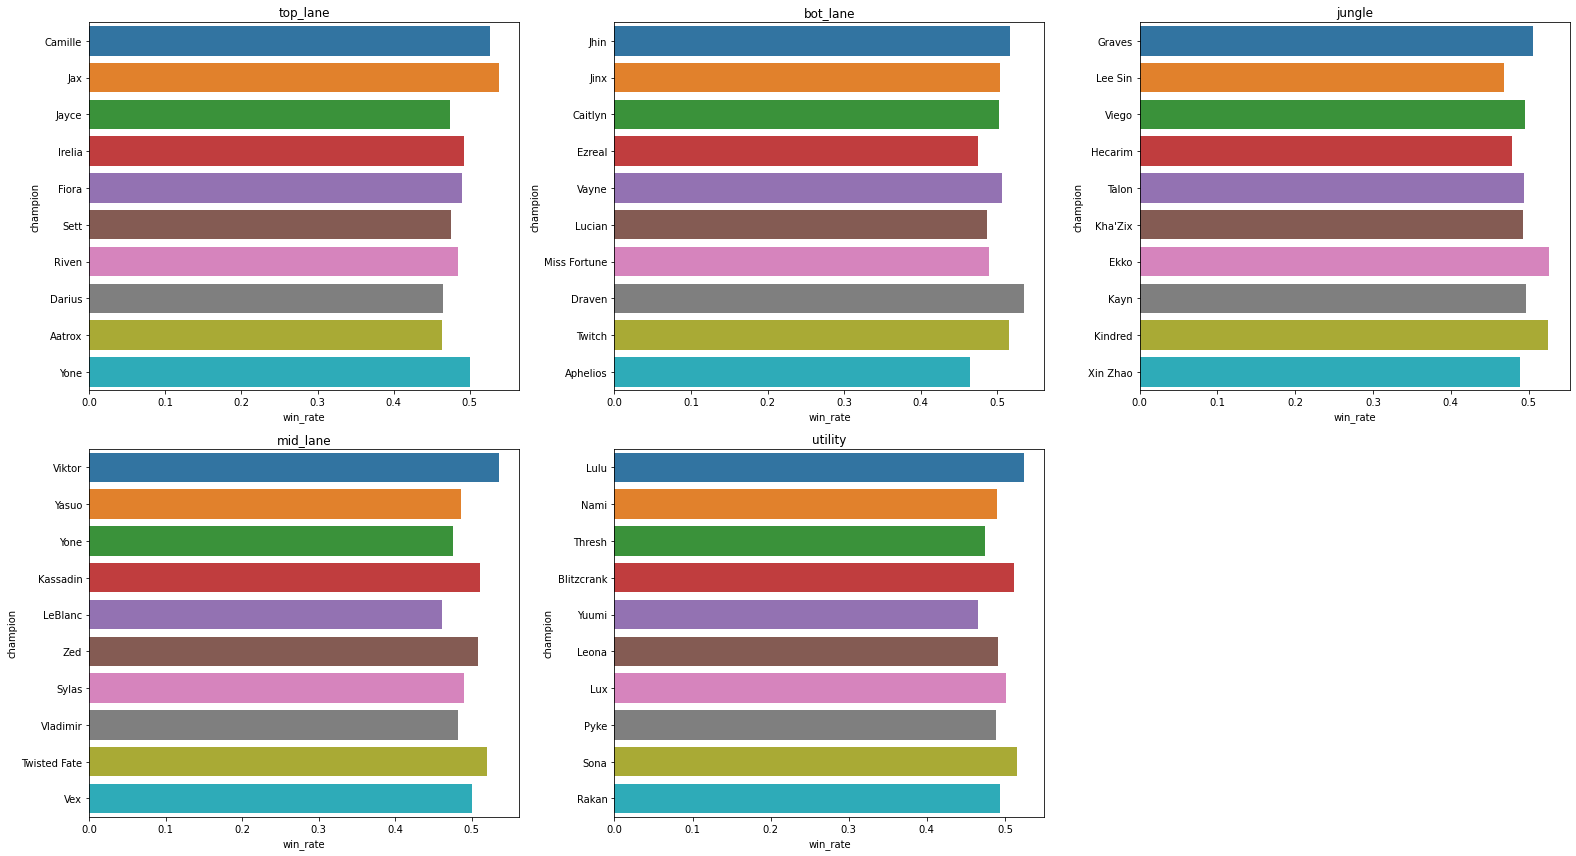

In [23]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(22,12))
fig.delaxes(axs[1][2])

sns.barplot(x="win_rate", y="champion", ax=axs[0][0], data=df[df["team_position"]=="top_lane"][:10]).set(title='top_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[1][0], data=df[df["team_position"]=="mid_lane"][:10]).set(title='mid_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[0][1], data=df[df["team_position"]=="bot_lane"][:10]).set(title='bot_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[1][1], data=df[df["team_position"]=="utility"][:10]).set(title='utility')
sns.barplot(x="win_rate", y="champion", ax=axs[0][2], data=df[df["team_position"]=="jungle"][:10]).set(title='jungle')
fig.tight_layout()
plt.show()

From these graphs, we can see that across all the different team positions, the top 10 champions end up having a winrate around 0.5, which is a pretty evenly balanced rate.

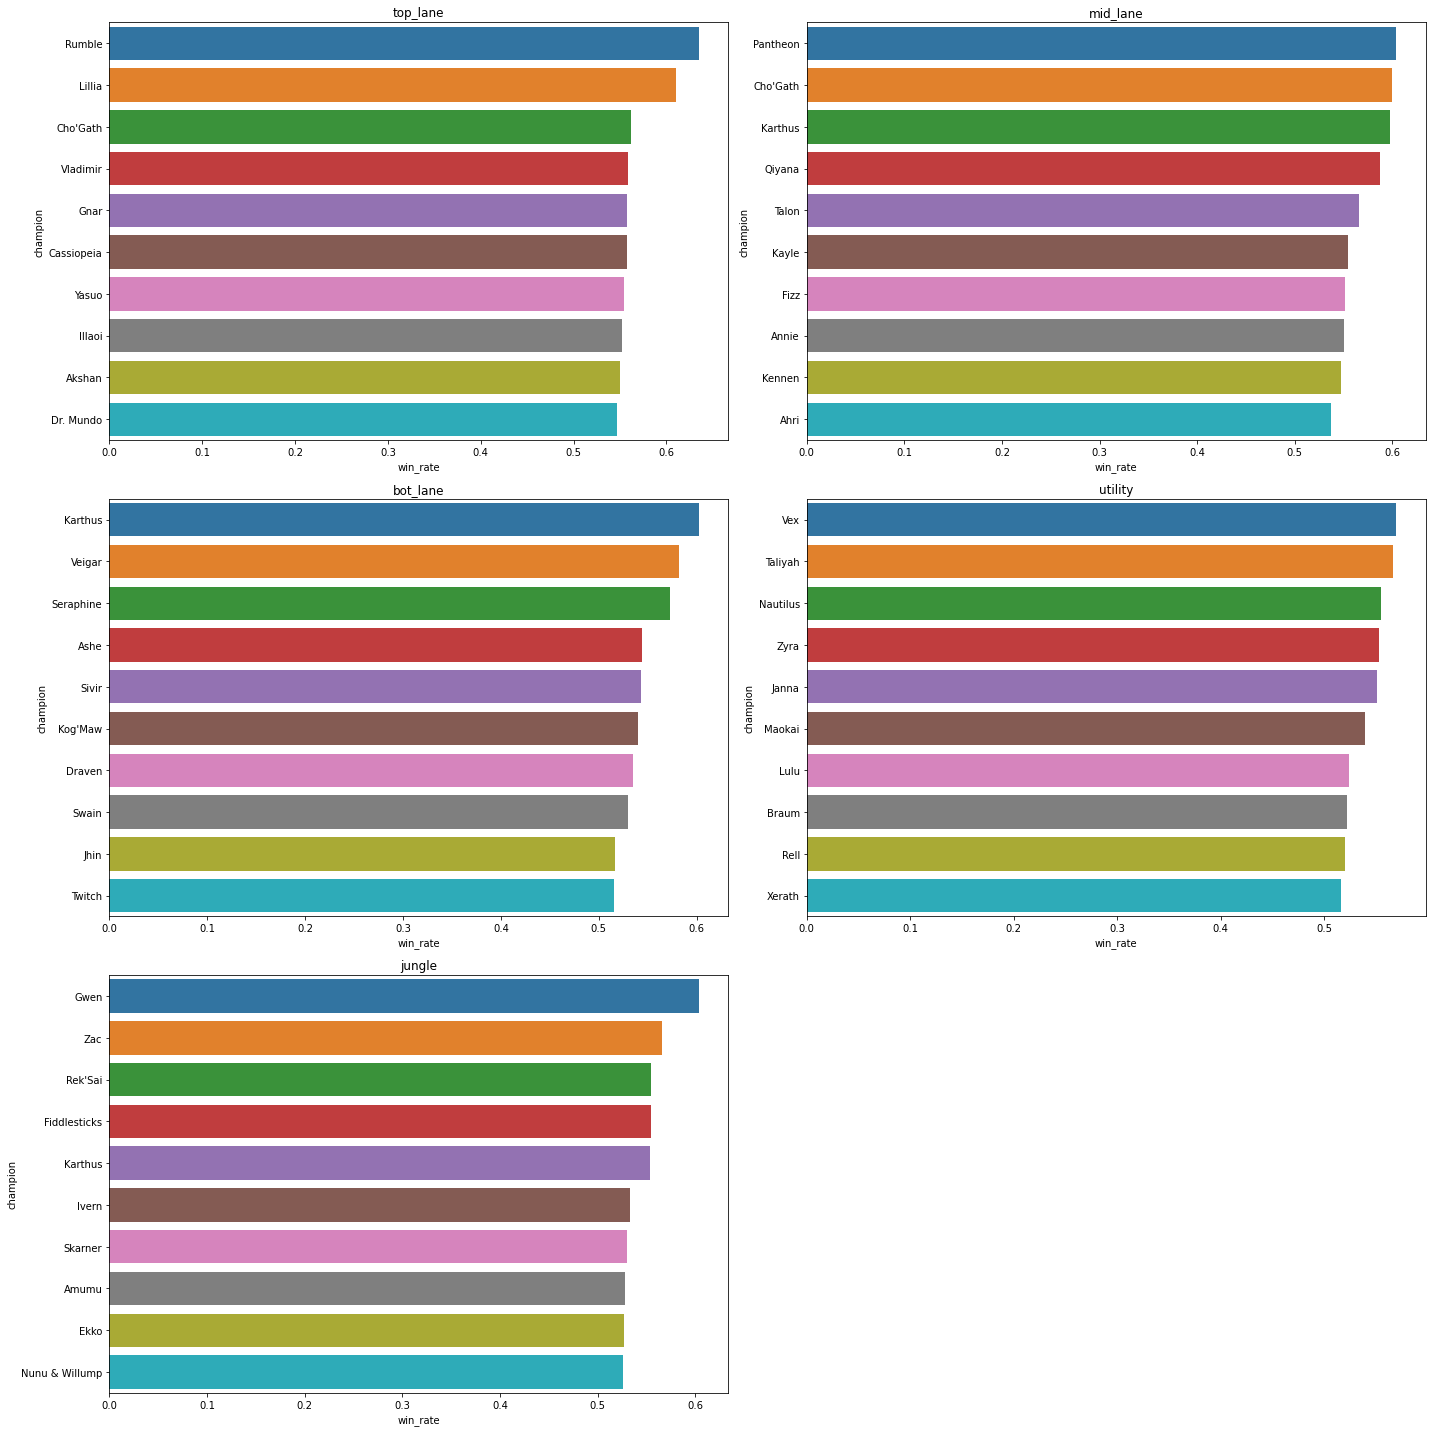

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
fig.delaxes(axs[2][1])

sns.barplot(x="win_rate", y="champion", ax=axs[0][0], data=df[(df["team_position"]=="top_lane") & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=False)[:10]).set(title='top_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[0][1], data=df[(df["team_position"]=="mid_lane")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=False)[:10]).set(title='mid_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[1][0], data=df[(df["team_position"]=="bot_lane")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=False)[:10]).set(title='bot_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[1][1], data=df[(df["team_position"]=="utility")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=False)[:10]).set(title='utility')
sns.barplot(x="win_rate", y="champion", ax=axs[2][0], data=df[(df["team_position"]=="jungle")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=False)[:10]).set(title='jungle')
fig.tight_layout()
plt.show()

The barplots above display the highest win rates of the champions played in their respective roles with more than 50 games played in total. From the barplots, we can see that there exist champions in every role which has a high win rate (60%). Perhaps we could see whether the champions in each lane with the highest win rate would make a suitable team in our predictive model.

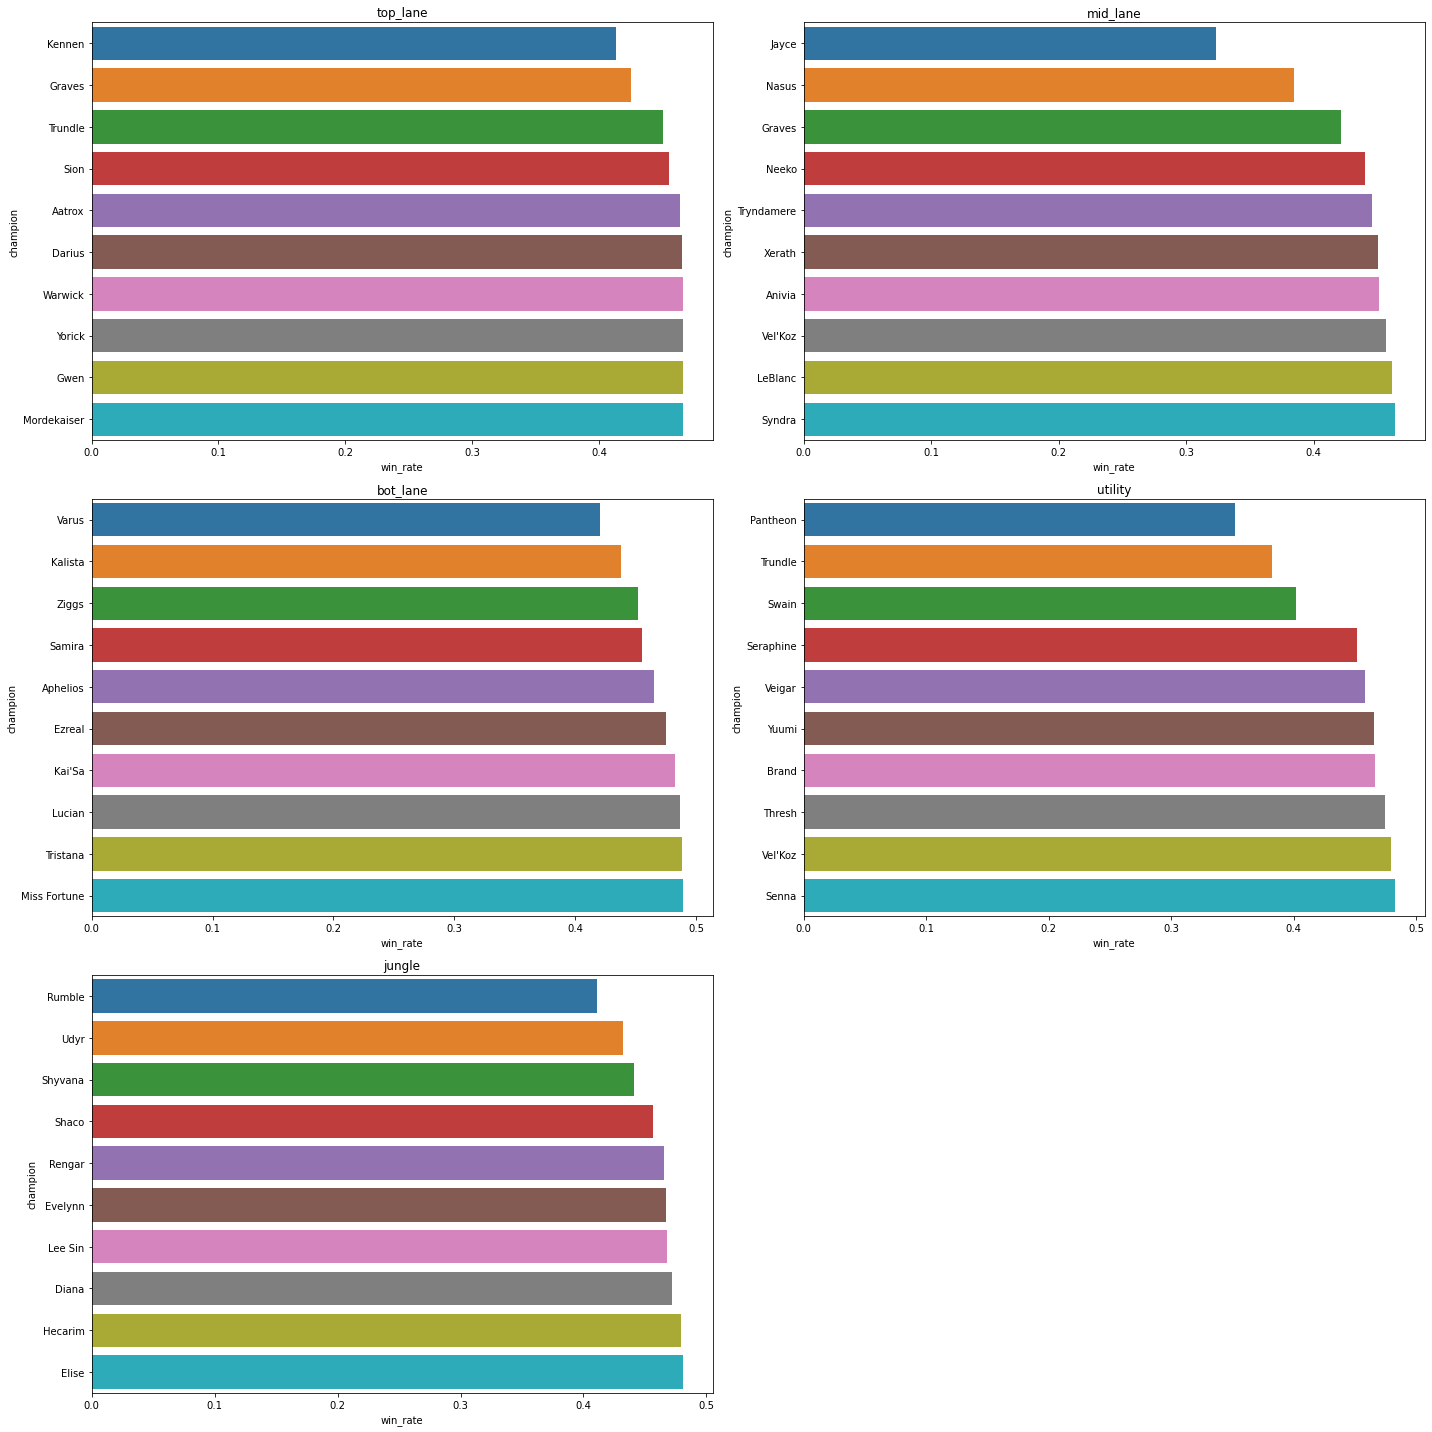

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
fig.delaxes(axs[2][1])

sns.barplot(x="win_rate", y="champion", ax=axs[0][0], data=df[(df["team_position"]=="top_lane") & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=True)[:10]).set(title='top_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[0][1], data=df[(df["team_position"]=="mid_lane")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=True)[:10]).set(title='mid_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[1][0], data=df[(df["team_position"]=="bot_lane")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=True)[:10]).set(title='bot_lane')
sns.barplot(x="win_rate", y="champion", ax=axs[1][1], data=df[(df["team_position"]=="utility")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=True)[:10]).set(title='utility')
sns.barplot(x="win_rate", y="champion", ax=axs[2][0], data=df[(df["team_position"]=="jungle")  & (df["games_played"] > 50)].sort_values(by="win_rate", ascending=True)[:10]).set(title='jungle')
fig.tight_layout()
plt.show()

The barplots above display the lowest win rates of the champions played in their respective roles with more than 50 games played in total. From the barplots, we can see that there exist champions in every role which has a low win rate of about 40%. Perhaps we could see whether the champions in each lane with the lowest win rate would have a low probability of winning in our model.

The cell below concatenates the the team compositions, and whether the team composition won or not.

In [26]:
data = [(win_comp[i], True) for i in range(len(match_ids))]
data += [(lose_comp[i], False) for i in range(len(match_ids))]

The cell below creates a data structure for the champions in the game, and will be used in our model as one hot encoded features.

In [27]:
champion_dict = dict(enumerate(np.unique([i[0] for i in data])))
champion_dict = dict((v,k) for k,v in champion_dict.items())

This creates the one hot encoded champion feature which we will feed into our logistic regression model to make predictions.

In [28]:
def feat(datum):
    feat = [1]
    for champion_selected in datum[0]:
        champion = [0]*len(champion_dict)
        champion[champion_dict[champion_selected]] = 1
        feat += champion
    return feat

The cell below shuffles the data, and creates the train set with their respective labels.

In [29]:
random.shuffle(data)
X_train = [feat(d) for d in data]
y_train = [d[1] for d in data]

We will train the model using Logistic Regression using the train set, and their respective labels (win or lost).

In [30]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", fit_intercept=True, C=1, class_weight="balanced")
model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight='balanced')

The cell below displays the probability of winning for a random match with a winning team composition, and a losing team composition. If the probability of winning for the win comp is more than the probability of winning for the lose comp, our model would make an accurate prediction.

In [31]:
team_composition = np.random.randint(len(data)/2)
prob = model.predict_proba([feat((win_comp[team_composition], True))])
print("Win Team Composition: " + str(win_comp[team_composition]))
print("Probability of Winning: " + str(prob[0][1]))
print()
prob = model.predict_proba([feat((lose_comp[team_composition], True))])
print("Lose Team Composition: " + str(lose_comp[team_composition]))
print("Probability of Winning: " + str(prob[0][1]))

Win Team Composition: ['Darius', 'Nidalee', 'Malzahar', 'Miss Fortune', 'Janna']
Probability of Winning: 0.4768232925616526

Lose Team Composition: ['Lucian', 'Fiddlesticks', 'Xerath', 'Riven', 'Lulu']
Probability of Winning: 0.3500306021212663


The cell below displays the probability of winning for the team composition (champions w/ highest win rates from the barplots above) against the team composition (champions w/ lowest win rates from barplots above). 

In [32]:
best_comp = ["Rumble", "Garen", "Pantheon", "Karthus", "Vex"]
prob = model.predict_proba([feat((best_comp, "N/A"))])
print("Best Team Composition: " + str(best_comp))
print("Probability of Winning: " + str(prob[0][1]))
print()
worse_comp = ["Kennen", "Rumble", "Jayce", "Varus", "Pantheon"]
prob = model.predict_proba([feat((worse_comp, "N/A"))])
print("Worse Team Composition: " + str(worse_comp))
print("Probability of Winning: " + str(prob[0][1]))

Best Team Composition: ['Rumble', 'Garen', 'Pantheon', 'Karthus', 'Vex']
Probability of Winning: 0.8967458639037902

Worse Team Composition: ['Kennen', 'Rumble', 'Jayce', 'Varus', 'Pantheon']
Probability of Winning: 0.08307742147669775


The cell below calculates the accuracy of the model on the training data set. We ended up getting a training accuracy of about 60% which is higher than the baseline 50% accuracy (randomly guessing).

In [33]:
correct = 0
for i in range(len(win_comp)):
    if model.predict_proba([feat((win_comp[i], True))])[0][1] > model.predict_proba([feat((lose_comp[i], False))])[0][1]:
        correct += 1
print("Training Accuracy: " + str(correct/len(win_comp)))

Training Accuracy: 0.6065187755607881


The cell below sets up the evaluation of our model on a test set, which is populated with data from another player in a similar ranking to the player we used to populate the training data.

In [34]:
matches = pd.read_csv("match_history_test.csv")
matches.drop(['summoner_name', "duration", 'summoner_level', 'damage_to_turrets', 'gold_earned', 'vision_score', 
              'minions_killed', 'first_blood', 'first_tower', 'turret_takedowns'], axis = 'columns', 
              inplace = True)
matches = matches.drop_duplicates()
matches_dict = dict(matches['match_id'].value_counts() == 10)
match_id = []

for i in matches_dict:
    if matches_dict[i] == True:
        match_id.append(i)
        
matches = matches[matches["match_id"].isin(match_id)]


match_ids = []
blue_comp = [] 
red_comp = []
win_comp = []
lose_comp = []

# After cleaning our data, every 10 iterations represents a unique match with 10 players.
for i in range(0, len(matches), 10):
    blue_temp = []
    red_temp = []
    win_temp = []
    lose_temp = []
    
    # Record the match_id.
    match_ids.append(matches.iloc[i]['match_id'])
    
    # Parse the first 5 players in the match representing the blue team, extract their team composition into an array representing whether they won/lost.
    for j in range(0, 5):
        blue_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
    # Parse the last 5 players in the match representing the red team, extract their team composition into an array representing whether they won/lost.
    for j in range(5, 10):
        red_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
        
    blue_comp.append(blue_temp)
    red_comp.append(red_temp)
    win_comp.append(win_temp)
    lose_comp.append(lose_temp)

# Display the team compositions for the first match
print("Match ID: " + str(match_ids[0]))
print("Red Team Composition: " + str(red_comp[0]))
print("Blue Team Composition: " + str(blue_comp[0]))

Match ID: 4105292087
Red Team Composition: ['Fiora', 'Evelynn', 'Caitlyn', "Kai'Sa", 'Lulu']
Blue Team Composition: ['Wukong', 'Qiyana', 'Katarina', 'Miss Fortune', 'Zyra']


The cell below calculates the accuracy of the model on the test set. We ended up getting about 58% accuracy on a set of data derived using a different player with a high ranking. This accuracy demonstates that it's possible to create a model to learn whether a team is going to win based on the team composition. 

In [35]:
correct = 0
for i in range(len(win_comp)):
    if model.predict_proba([feat((win_comp[i], True))])[0][1] > model.predict_proba([feat((lose_comp[i], False))])[0][1]:
        correct += 1
print("Test Accuracy: " + str(correct/len(win_comp)))

Test Accuracy: 0.5776173285198556


# Ethics & Privacy

Since the Riot Games API is not private, all of the data that is being utilized in our dataset is public. We also placed on emphasis on the characters instead of the players in each game. Thus, there are no concerns in terms of privacy.

In terms of potential bias for our dataset, League of Legends, as a whole, is has constant updates. There are new updates every 2 weeks which involve release of new champions, certain champions being made stronger or weaker, release of new items, changes in priority for objectives, etc. All of these changes radically change what champions are more or less likely to win a game. This leads to some champion winrates showing a lot of variance when you look at their statistics from a more broad time window, ie. 6 months or a year. Another potential bias is that our dataset mainly consists of matches that are comprised of more skilled players. Players with lower skill level are not able to utilize the strengths of their champions as much as players with higher skill level which will cause variance in the data visualization if we take into account data from all skill levels. 

We can fix these issues by running our model every 2 weeks in order to keep up with the rapidly changing state of the game. We can also run our model on different datasets that consists of matches that are comprised of players of other skill levels. Employing these fixes will allow us to have a more accurate predictor of overall chance of winning a game based off of the champions picked in the matchmaking process.

# Conclusion & Discussion

After training our machine learning algorithm to predict which team composition has a higher probability of winning, we were able to create a model which performs with an accuracy of 60% on the training set, and 58% on the test set. Given the sheer amount of different champions, and potential team compositions, the model seems to exceed our expectations with its preformance. Given our inital hypothesis, we were able to create a model which exceeds the accuracy of a baseline model which makes random predictions on which team would win (50%). The applications for a model such as this demonstates that team composition has some correlation with whether a team would win a certain matchup before the game even starts, and could be used to decide whether a game is better worth dodging and finding a new match.

One of the flaws with our model is that we're limited in the quality of data we can gather from Riot Games (creators of league of legends), and would need to update the dataset for any game updates, and players with low rankings. The applications of such model can be utilized to create a webpage which tells a player whether they should dodge a matchmaking lobby given the team composition, or be used to leverage online gambling websites where people bet on which team would win the game. We've yet to optimize our model to the fullest, but believe that the model could be further improved by possibly implementing multi-layer neural networks, improving the quality of the data, and updating the model for a wide variety of player rankings (high elo, low elo).

# Team Contributions

* Jacky Dam - I worked on building the webscraper to extract our data, processing the data, and creating the model to make               predictions.

* Katherine Lim - EDA/Project Cleaning

* Michael Phung - Research Question/Conclusion

* Daniel Lam - Data Wrangling/EDA